# Jupyter Notebook for flawless branch

## Code to show various image variants after processing them with kernels

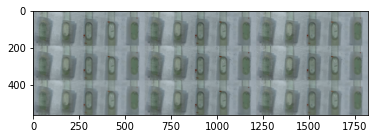

In [27]:
# State: works
# ToDo: *empty*
''' 
Imports:
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

import X_Code.variables as v

''' 
Code:
'''
def kernel_variants(img):
    '''
    Basic modification:
    '''
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, v.kernel)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, v.kernel)

    img_openXclose = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, v.kernel)

    '''
    Advanced modification:
    '''
    img_erode = cv2.erode(img, v.kernel3, iterations=1)
    img_dilate = cv2.dilate(img_erode, v.kernel3, iterations=1)

    img_close2 = cv2.morphologyEx(img_dilate, cv2.MORPH_CLOSE, v.kernel2)

    img_open2 = cv2.morphologyEx(img_dilate, cv2.MORPH_OPEN, v.kernel2)
    img_open3 = cv2.morphologyEx(img_close2, cv2.MORPH_OPEN, v.kernel3)

    '''
    Show: maybe use imagesStacked():
    '''
    # Stacked:
    images_stacked = v.stackImages(0.6, ([img, img_open, img_close],# Basics
                                         [img_openXclose, img_erode, img_dilate], # Advanced
                                         [img_close2, img_open2, img_open3]))

    '''
    # Basics:
    cv2.imshow('Input', img) 
    cv2.imshow('Close', img_close)
    cv2.imshow('Open', img_open)
    cv2.imshow('Open + Close', img_openXclose)

    # Advanced:
    cv2.imshow('Erode + Dilate', img_dilate)
    cv2.imshow('Erode + Dilate + Close',img_close2)
    cv2.imshow('Erode + Dilate + Open',img_open2) 
    cv2.imshow('Erode + Dilate + Close + Open',img_open3) 
    '''   

    #cv2.imwrite('Input.png', img)
    #cv2.imwrite('Close.png', img_close)
    #cv2.imwrite('Open.png', img_open)
    #cv2.imwrite('ErodeDilate.png', img_dilate)
    #cv2.imwrite('ErodeDilateClose.png',img_close2)
    #cv2.imwrite('ErodeDilateOpen.png',img_open2)
    #cv2.imwrite('ErodeDilateCloseOpen.png', img_open3) 

    #cv2.imshow("Stacked Images", images_stacked)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    plt.imshow(images_stacked)
    plt.show()


kernel_variants(v.image_int)

## Code for the removal of inpaintings


In [ ]:
# State: not working
# ToDo: terminal message: "measure is not definded" (?)
'''
Code:
'''
def create_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    _,thresh_img = cv2.threshold( blurred, 180, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img, neighbors=8, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )

        dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
        cv2.imshow('dst', dst)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

create_mask(v.image_int)